In [65]:
# importing libs

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [66]:
df  = pd.read_csv("insurance.csv")

In [67]:
df.head(5)

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01


In [68]:
df.tail(3)

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87
1339,1340,30.00,female,47.40,101,No,0,Yes,southeast,63770.43


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [70]:
df.shape

(1340, 10)

In [71]:
pd.set_option("display.float_format","{:.2f}".format)

In [72]:
sns.set(style = "whitegrid",palette="Set2" , font_scale=1.1)

In [73]:
df.duplicated().sum()

np.int64(0)

In [74]:
df.isnull().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [75]:
df.dropna(inplace=True,axis=0)

In [76]:
df.isnull().sum()

Id               0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [77]:
df.describe(include="all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


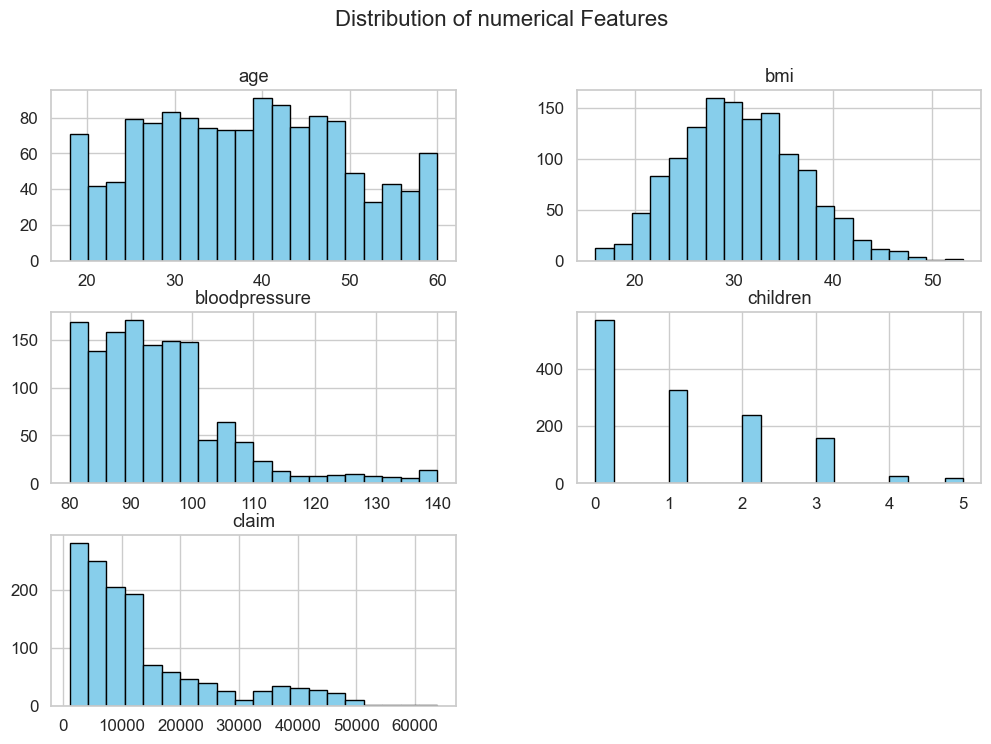

In [78]:
numerical_columns  = ["age","bmi","bloodpressure","children","claim"]
df[numerical_columns].hist(bins=20,figsize=(12,8),color = "skyblue",edgecolor = "black")
plt.suptitle("Distribution of numerical Features" ,fontsize =16)
plt.show()

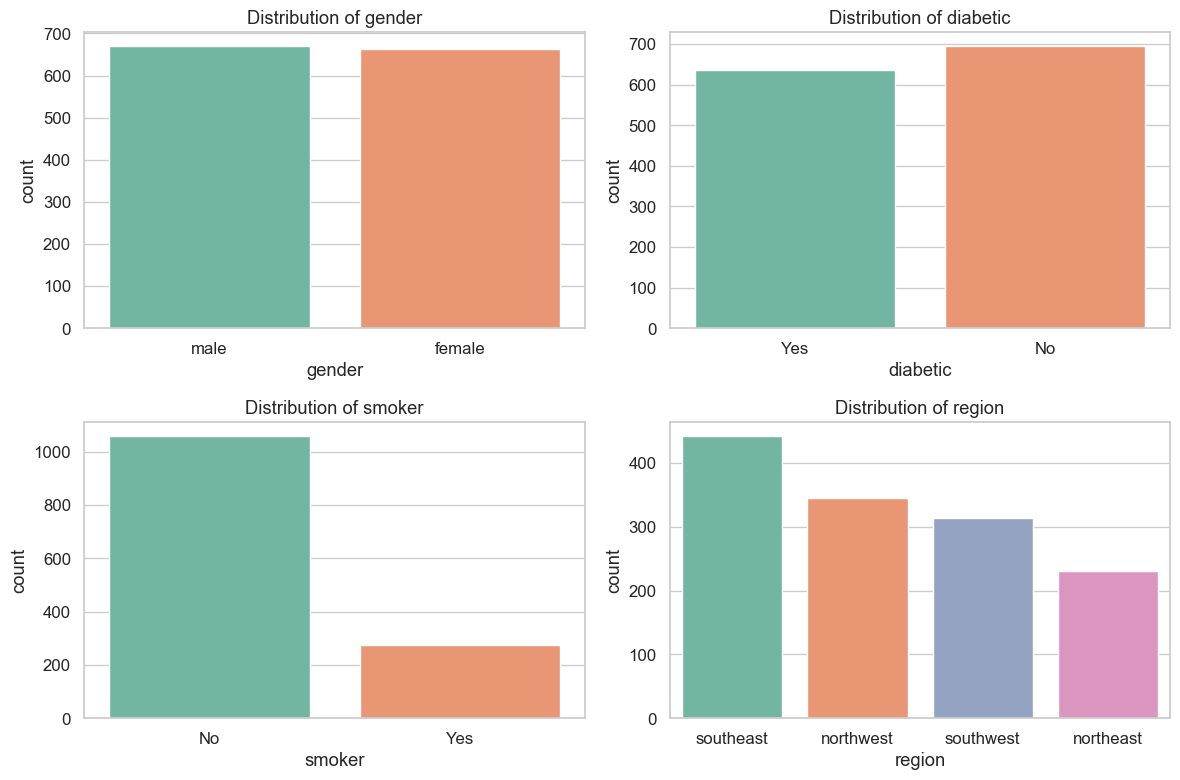

In [79]:
cat_cols = ['gender','diabetic','smoker','region']
plt.figure(figsize=(12,8))

for i,col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data = df , x = col,palette="Set2")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()




In [80]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim'],
      dtype='object')

In [81]:
df.groupby(['gender','smoker'])['claim'].mean().round()

gender  smoker
female  No        8762.00
        Yes      30679.00
male    No        8169.00
        Yes      33042.00
Name: claim, dtype: float64

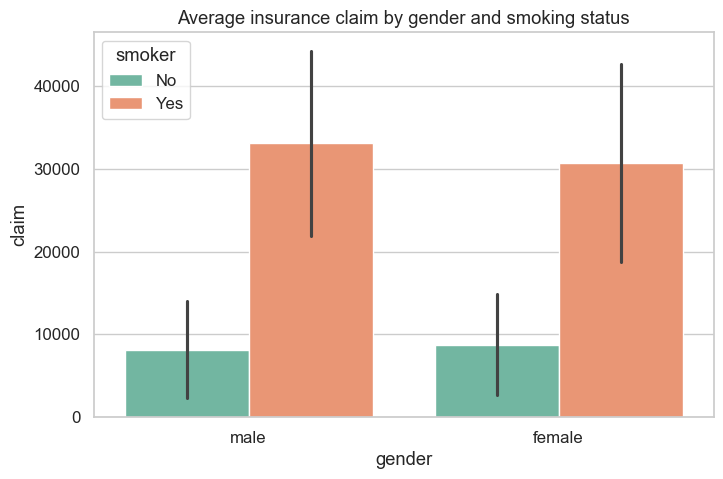

In [82]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x = 'gender',y='claim',hue='smoker',estimator='mean',errorbar='sd')
plt.title('Average insurance claim by gender and smoking status')
plt.show()

In [83]:
pivot_region_diabetic = df.groupby(['region','diabetic'])['claim'].mean().unstack()

In [84]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


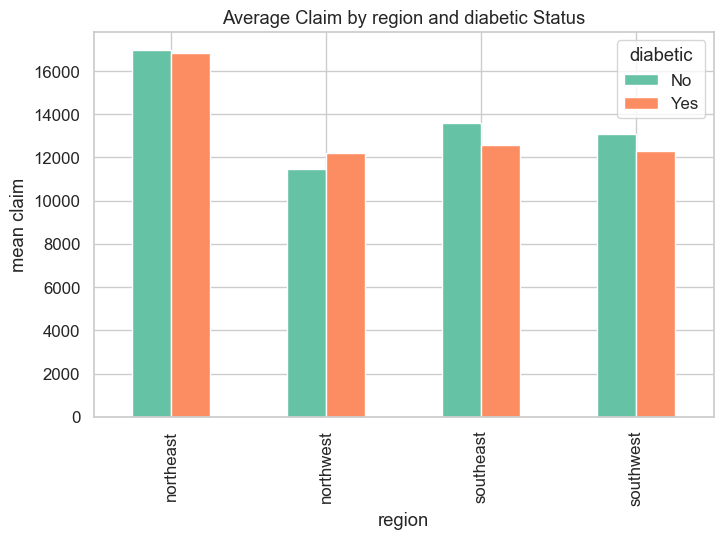

In [85]:
pivot_region_diabetic.plot(kind='bar',figsize=(8,5))
plt.title("Average Claim by region and diabetic Status")
plt.ylabel("mean claim")
plt.xlabel("region")
plt.show()


In [86]:
pivot_table = pd.pivot_table(df,values='claim',index='region',columns='smoker' ,aggfunc= 'mean')
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [87]:
pivot_table = pd.pivot_table(df,values='claim',index = 'children',columns='diabetic',aggfunc='mean')
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [88]:
numerical_columns

['age', 'bmi', 'bloodpressure', 'children', 'claim']

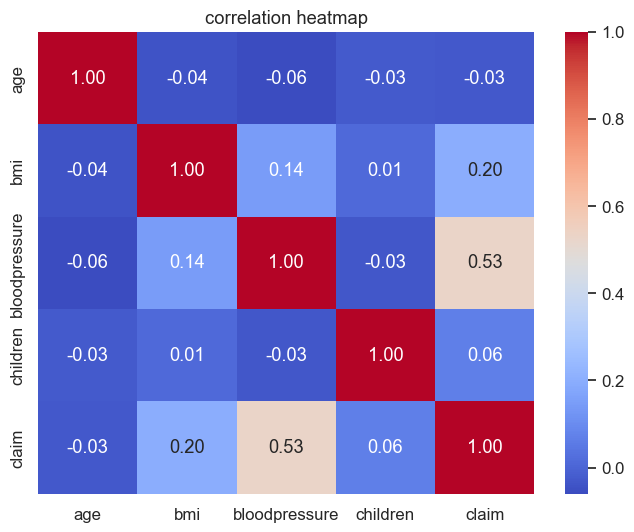

In [89]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_columns].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap')
plt.show()

Text(0.5, 1.0, 'claim vs age by smoker and gender')

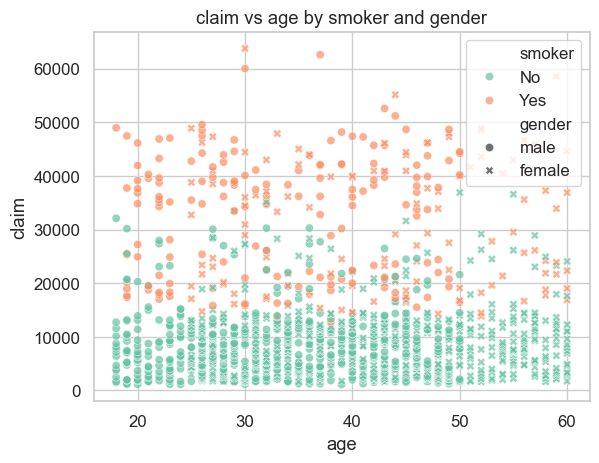

In [90]:
sns.scatterplot(data=df,x = 'age',y = 'claim',hue='smoker',style='gender',alpha =0.7)
plt.title("claim vs age by smoker and gender" )

Text(0.5, 1.0, 'relationship between BMI and amount')

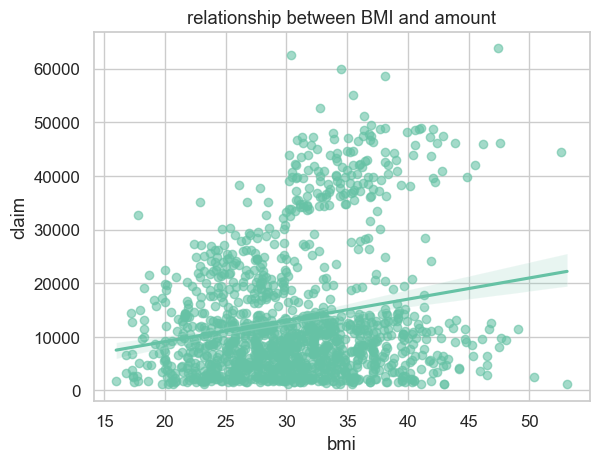

In [91]:
sns.regplot(data=df,x = 'bmi',y='claim',scatter_kws={"alpha":0.6})
plt.title("relationship between BMI and amount")

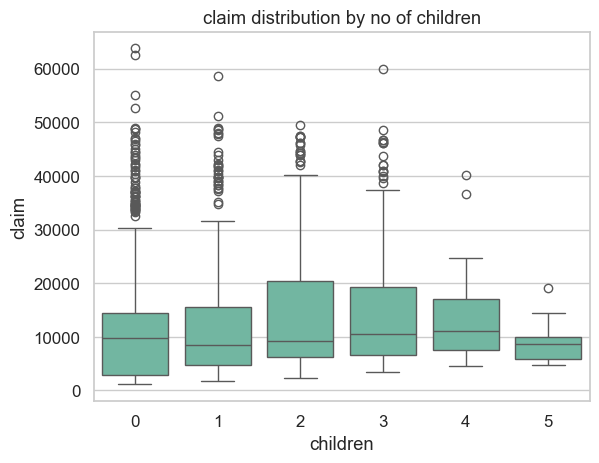

In [92]:
sns.boxplot(data = df,x = 'children',y='claim')
plt.title('claim distribution by no of children')
plt.show()

In [93]:
df['age_group'] = pd.cut(df['age'],bins = [0,18,30,45,60,100],labels=['<18','18-30','30-45','45-60','60+'])

In [94]:
df.head(3)

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,30-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30


In [95]:
df.age_group.value_counts()

age_group
30-45    553
45-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

Text(0.5, 1.0, 'Average claim by age group')

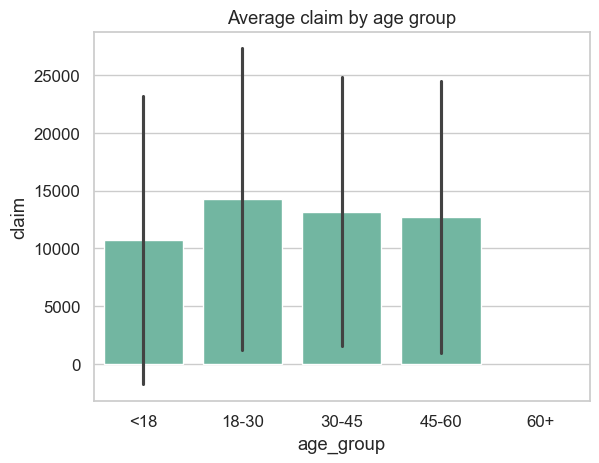

In [96]:
sns.barplot(data = df,x='age_group',y='claim',estimator='mean',errorbar='sd')
plt.title("Average claim by age group")

In [97]:
df['bmi_category'] = pd.cut(df['bmi'],bins = [0,18.5,24.9,29.9,100],labels=['underweight','normal','over weight','obese'])


In [98]:
df.bmi_category.value_counts()

bmi_category
obese          702
over weight    387
normal         222
underweight     21
Name: count, dtype: int64

In [99]:
import warnings
warnings.filterwarnings('ignore')

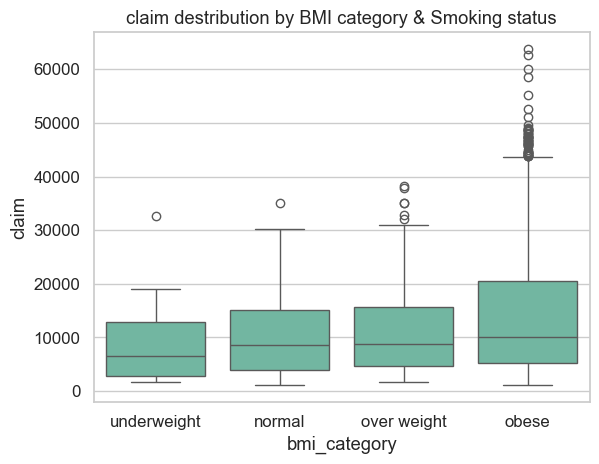

In [100]:
sns.boxplot(data = df,x='bmi_category',y='claim')
plt.title('claim destribution by BMI category & Smoking status')
plt.show()

In [101]:
region_stats = df.groupby('region').agg(
    smoker_rate = ('smoker',lambda x: (x=='yes').mean()*100),
    mean_claim = ('claim','mean')
).reset_index()


In [102]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,0.00,16889.04
1,northwest,0.00,11794.22
2,southeast,0.00,13085.50
3,southwest,0.00,12723.13


### feature engineering

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import joblib

In [104]:
df.columns 

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [105]:
X = df.drop(columns=['claim','age_group','bmi_category','Id','region'])


In [106]:
y = df.claim

In [107]:
cat_cols = ['gender', 'diabetic', 'smoker']
label_encoders = {}

In [108]:
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le,f"label_encoder_{col}.pkl")

In [109]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [110]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [111]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=69)

In [112]:
num_cols= ['age','bmi','bloodpressure','children']
scaler = StandardScaler()

In [113]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [114]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [115]:
print(X_train.shape,X_test.shape)

(1065, 7) (267, 7)


### Model training

In [116]:
# importing libs 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor

In [117]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    return {'R2':r2,'MEA':mae,'RMSE':rmse}

In [118]:
results = {}

In [124]:
lr = LinearRegression()
lr.fit(X_train,y_train)
results["Linear Regression"] = evaluate_model(lr,X_train,X_test,y_train,y_test)
print("Linear Regression model is trained")


best_poly_model = None
best_poly_score = - np.inf

for degree in [2,3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly,y_train)

    score = poly_lr.score(X_train_poly,y_train)

    if score > best_poly_score:
        best_poly_score = score
        best_poly_model = (degree,poly,poly_lr)


degree ,poly,poly_lr = best_poly_model
results[f"Polynomial regression (deg = {degree})"] = evaluate_model(poly_lr,poly.fit_transform(X_train),poly.transform(X_test),y_train,y_test)

print("polynomial regression model are trainned")

# random forest reg

rf = RandomForestRegressor()

rf_params = {
    "n_estimators":[100,200],
    "max_depth" : [None,10,20],
    "min_samples_split" : [2,5],
    "min_samples_leaf":[1,2]
}

rf_grid = GridSearchCV(rf,rf_params,cv = 3,scoring = 'r2',n_jobs = -1 ,verbose=0)

rf_grid.fit(X_train,y_train)
best_rf = rf_grid.best_estimator_

results['random forest'] = evaluate_model(best_rf,X_train,X_test,y_train,y_test)

print(" Random forest training is completed and the best parameters ",rf_grid.best_params_)


svr = SVR()

svr_params = {
    'kernel' : ['rbf','poly','linear'],
    'C':[1,10,50],
    'epsilon':[0.1,0.2,0.5],
    'degree':[2,3]

}

svr_grid = GridSearchCV(svr,svr_params,cv = 3,scoring = 'r2',n_jobs = -1,verbose=0)
svr_grid.fit(X_train,y_train)

best_svr = svr_grid.best_estimator_

results['svr'] = evaluate_model(best_svr,X_train,X_test,y_train,y_test)

print("SVR training is completed , best parameters: ", svr_grid.best_params_)



xgb = XGBRegressor(objective="reg:squarederror")

xgb_params = {
    'n_estimators':[100,200],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.05,0.1],
    'subsample':[0.8,1.0]
}

xgb_grid = GridSearchCV(xgb,xgb_params,cv = 3,scoring="r2",n_jobs =-1,verbose=0)
xgb_grid.fit(X_train,y_train)
best_xgb = xgb_grid.best_estimator_

results['XGBoost'] = evaluate_model(best_xgb,X_train,X_test,y_train,y_test)

print("XGBoost training is completed , best parameters : " , xgb_grid.best_params_)


Linear Regression model is trained
polynomial regression model are trainned
 Random forest training is completed and the best parameters  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
SVR training is completed , best parameters:  {'C': 50, 'degree': 2, 'epsilon': 0.1, 'kernel': 'linear'}
XGBoost training is completed , best parameters :  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [125]:
results

{'Linear Regression': {'R2': 0.6904241467593211,
  'MEA': 5164.21763775497,
  'RMSE': np.float64(6678.935969312383)},
 'Polynomial regression (deg = 3)': {'R2': 0.754662768387304,
  'MEA': 4525.769743601932,
  'RMSE': np.float64(5945.733931084723)},
 'random forest': {'R2': 0.7959064689313646,
  'MEA': 4096.992482428024,
  'RMSE': np.float64(5422.9844660541985)},
 'svr': {'R2': 0.5117111211845163,
  'MEA': 5826.092609040801,
  'RMSE': np.float64(8388.072144712021)},
 'XGBoost': {'R2': 0.8006764676100113,
  'MEA': 4075.4928056238296,
  'RMSE': np.float64(5359.237802410022)}}

In [126]:
results_df = pd.DataFrame(results).T.sort_values(by = 'R2',ascending=False)
results_df

,R2,MEA,RMSE
XGBoost,0.80,4075.49,5359.24
random forest,0.80,4096.99,5422.98
Polynomial regression (deg = 3),0.75,4525.77,5945.73
Linear Regression,0.69,5164.22,6678.94
svr,0.51,5826.09,8388.07


In [127]:
best_rf

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [128]:
models = {
    'Linear Regression': lr,
    'Polynomial regression':poly_lr,
    'Random Forest': best_rf,
    'SVM':best_svr,
    'XGBoost':best_xgb

}

In [129]:
best_r2 = results_df['R2'].max()

In [130]:
best_r2

np.float64(0.8006764676100113)

In [131]:
top_model = results_df[results_df['R2']==best_r2]

In [132]:
top_model

,R2,MEA,RMSE
XGBoost,0.80,4075.49,5359.24


In [133]:
best_model = models[top_model.index[0]]
best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [136]:
joblib.dump(best_model,"best_model.pkl")
print(f"Best model selected : {top_model.index[0]}") 

Best model selected : XGBoost
